# IMDB Review Sentiment Analysis
 IMDb is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

## Introduction
Opinion mining (sometimes known as sentiment analysis or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. We can use classifiers on textual data to classify the text into its signified emotion. This can be used in various ways to predict the sentiments of any text automatically after it is trained in a corpus of sentences.

## Understanding the Problem
Here We have a datset which contains the reviews of audience for a particular movie. In this project we will classify the IMDB reviews for positive and negative sentiments.

## The solution is divided into the following sections:

- Data understanding and exploration
- Data Preprocessing
- Data preparation
- Model building and evaluation


# 1. Data Understanding and Exploration¶


### Importing dataset
Importing libraries to be used on the dataset

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

Converting the text dataset to a table (data) .

The dataset contains text entries with respective setiment values

 - 1 for positive
 - 0 for negative

In [560]:
data=pd.read_csv("data.txt",delimiter='\t+',names=["feedback","label"])
data.head()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,feedback,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [561]:
#Checking whether the data has any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
feedback    1000 non-null object
label       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [562]:
#Displaying the no. of rows and columns in the data
data.shape

(1000, 2)

### Performing EDA

checking the value count of column "label" in data

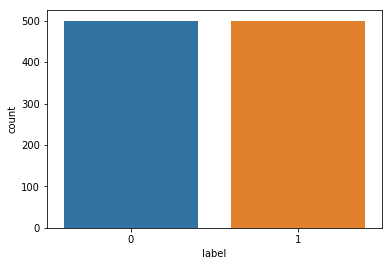

In [563]:
sns.countplot(x="label",data=data)

No clear result can be drawn from the graph , therefore calculating the value count of the values in column "label"

In [564]:
data["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

Adding a new column "feedback_length" to data .

Performing multivarient analysis on "label" and "feedback_length" .

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


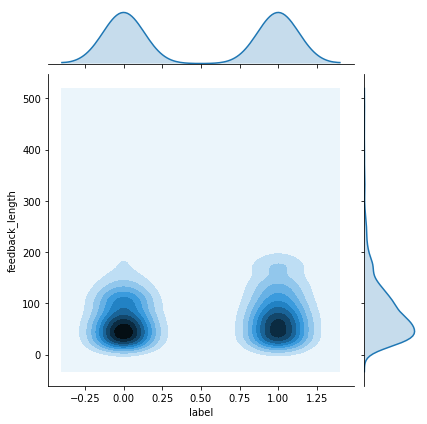

In [565]:
data["feedback_length"]=data["feedback"].apply(lambda x: len(x))
sns.jointplot(x= data["label"] ,y=data["feedback_length"], kind='kde')

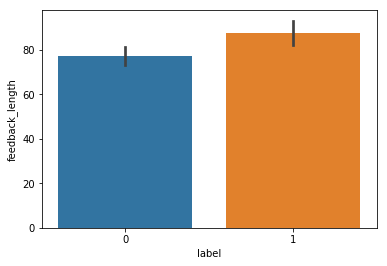

In [566]:
sns.barplot(x=data["label"],y=data["feedback_length"])

### Conclusion from the above graphs :
    - both the classes are equally distributed ( value count of positive and negative sentiment is same)
    - positive sentiment reviews(data having value 1 in "label" column of the dataset ) have longer text
    - negative sentiment reviews (data having value 1 in "label" column of the dataset ) are mostly short


### Popular words in Review
A look at the review's popular words in positive sentiment ("label" value=1) and negative sentiment ("label" value=0) 

In [567]:
df1=data[data["label"]==0]
words1=" ".join(df1["feedback"])
negative_words=" ".join([word for word in words1.split()])

In [568]:
wordcloud1=WordCloud(stopwords=STOPWORDS,background_color="black",width=1600,height=800).generate(negative_words)

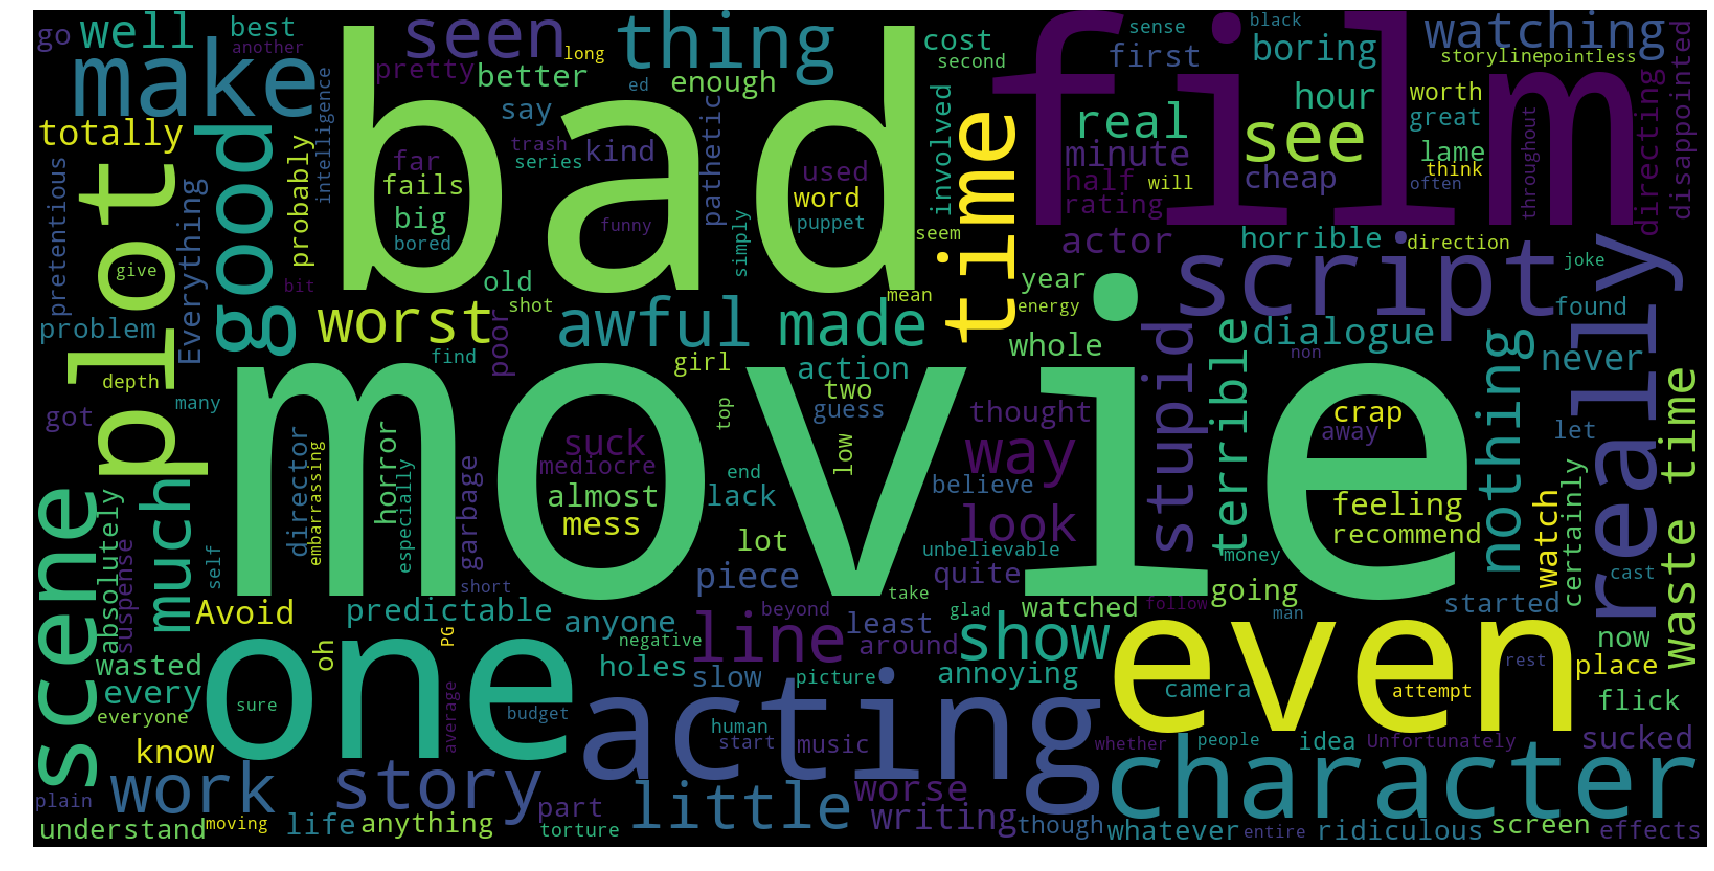

In [569]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [570]:
df2=data[data["label"]==1]
words2=" ".join(df2["feedback"])
positive_words=" ".join([word for word in words2.split()])

In [571]:
wordcloud2=WordCloud(stopwords=STOPWORDS,background_color="black",width=1600,height=800).generate(positive_words)

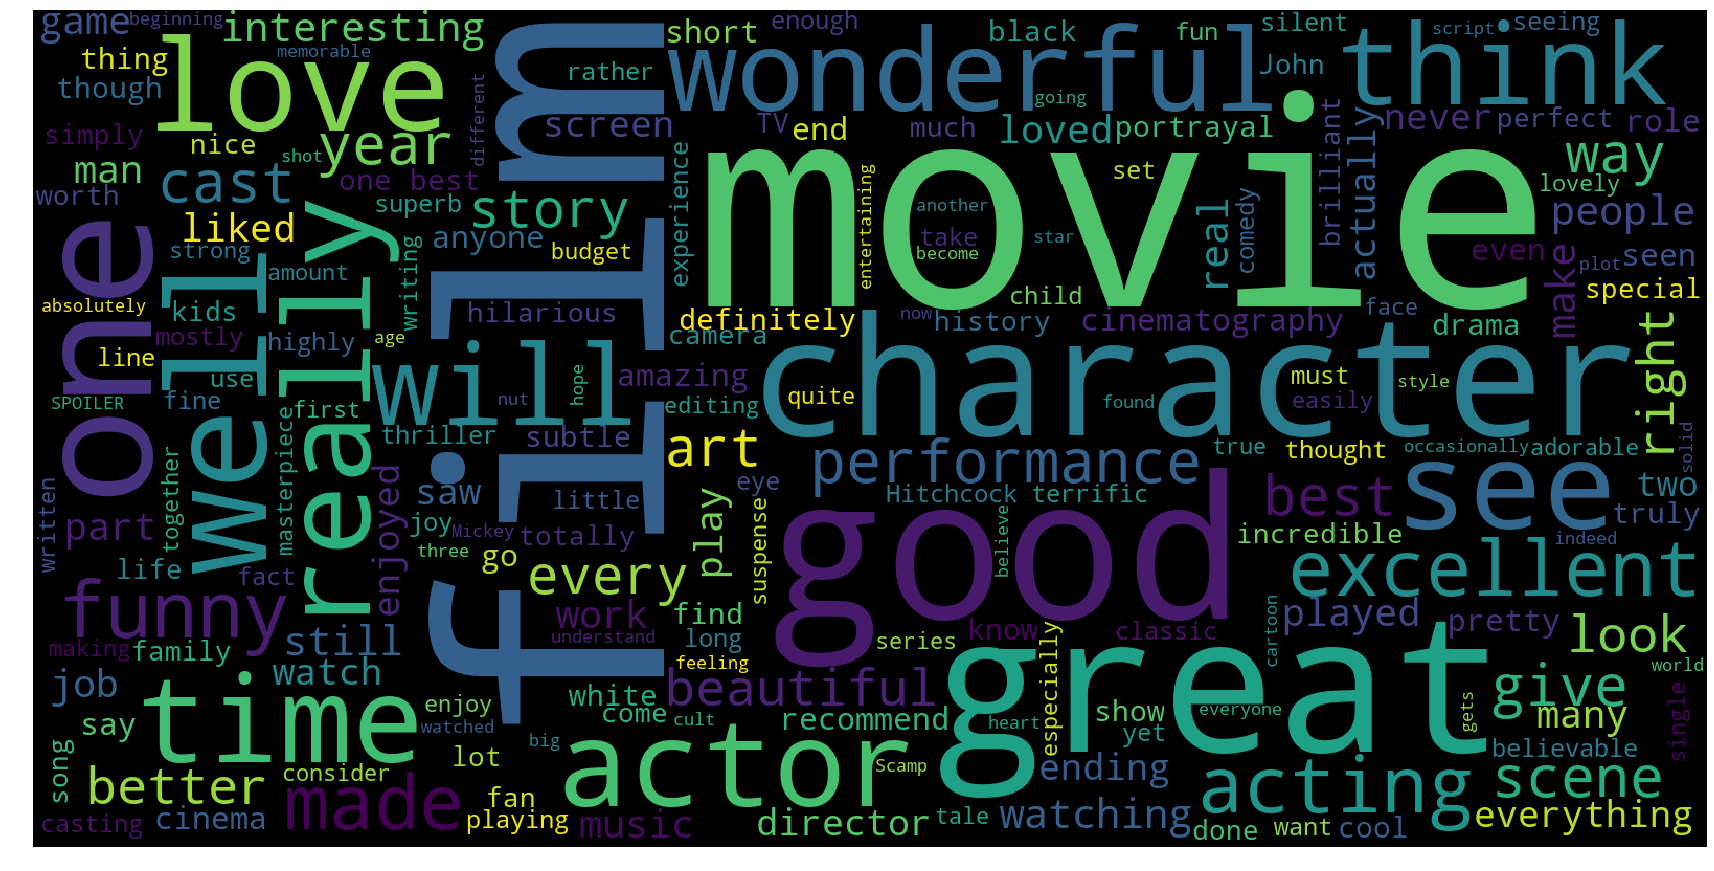

In [572]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Reviews shows that both positive and negative reviews have many popular words, such as "movie", "film", "character", "one", "good", and "movie" common to both . 

performing worcloud again after removing the common words in positive_words and negative_words

In [573]:
negative_words2=""
for i in negative_words.split():
    if i not in positive_words:
        negative_words2+=i+" "

In [574]:
wordcloud12=WordCloud(stopwords=STOPWORDS,background_color="black",width=1600,height=800).generate(negative_words2)

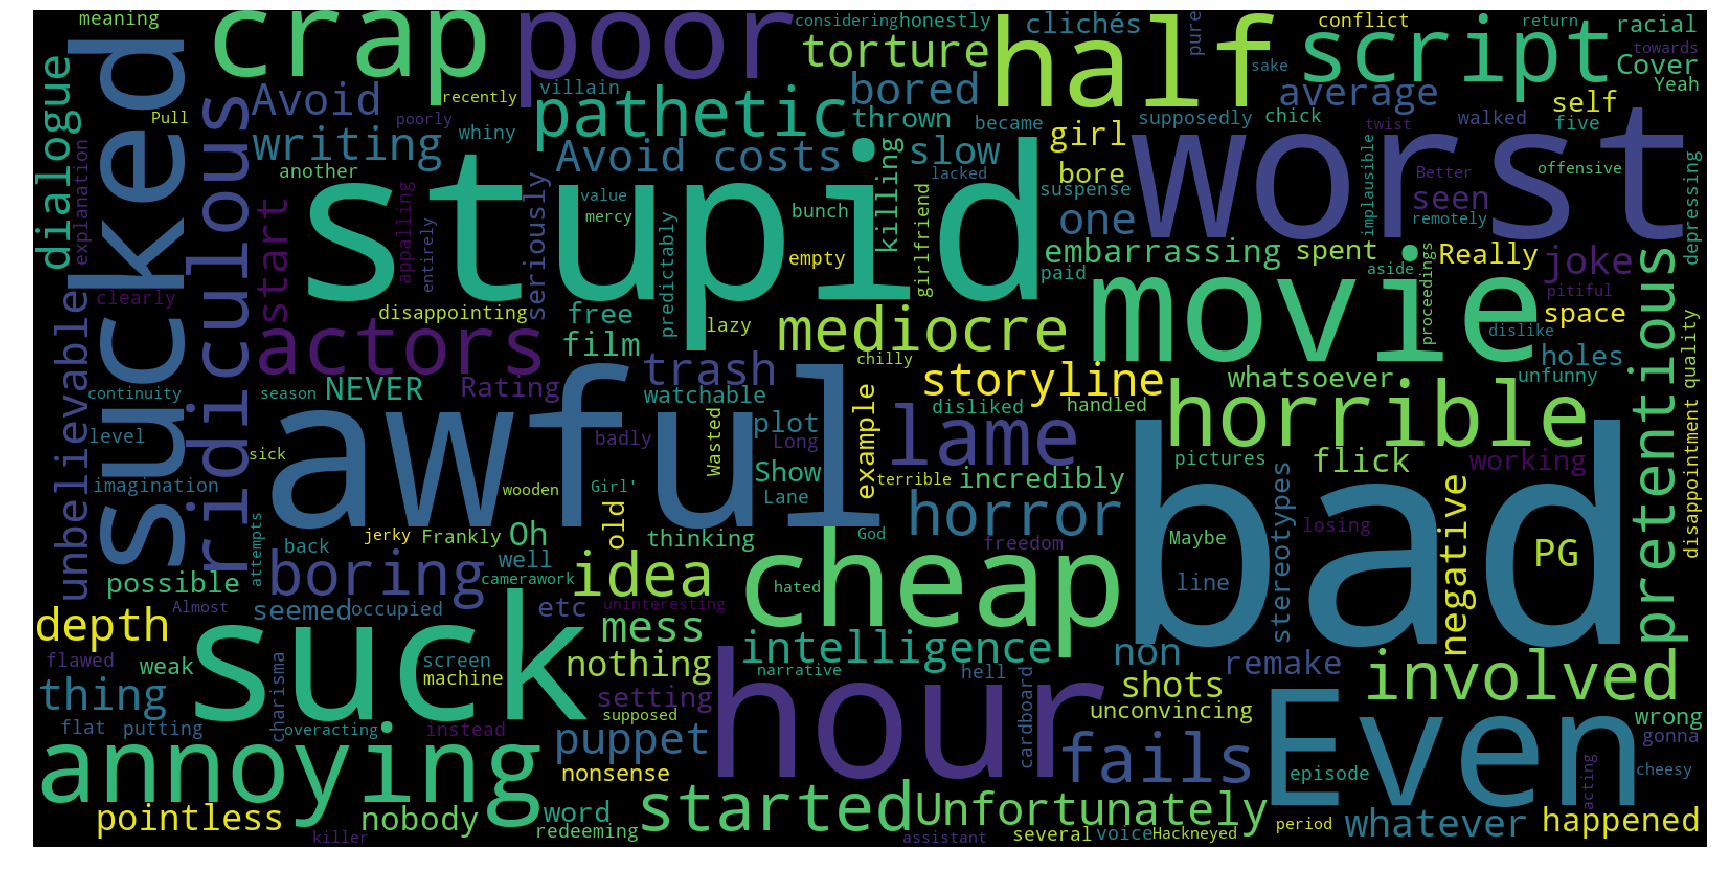

In [575]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud12)
plt.axis("off")
plt.show()

In [576]:
positive_words2=""
for i in positive_words.split():
    if i not in negative_words:
        positive_words2+=i+" "

In [577]:
wordcloud22=WordCloud(stopwords=STOPWORDS,background_color="black",width=1600,height=800).generate(positive_words2)

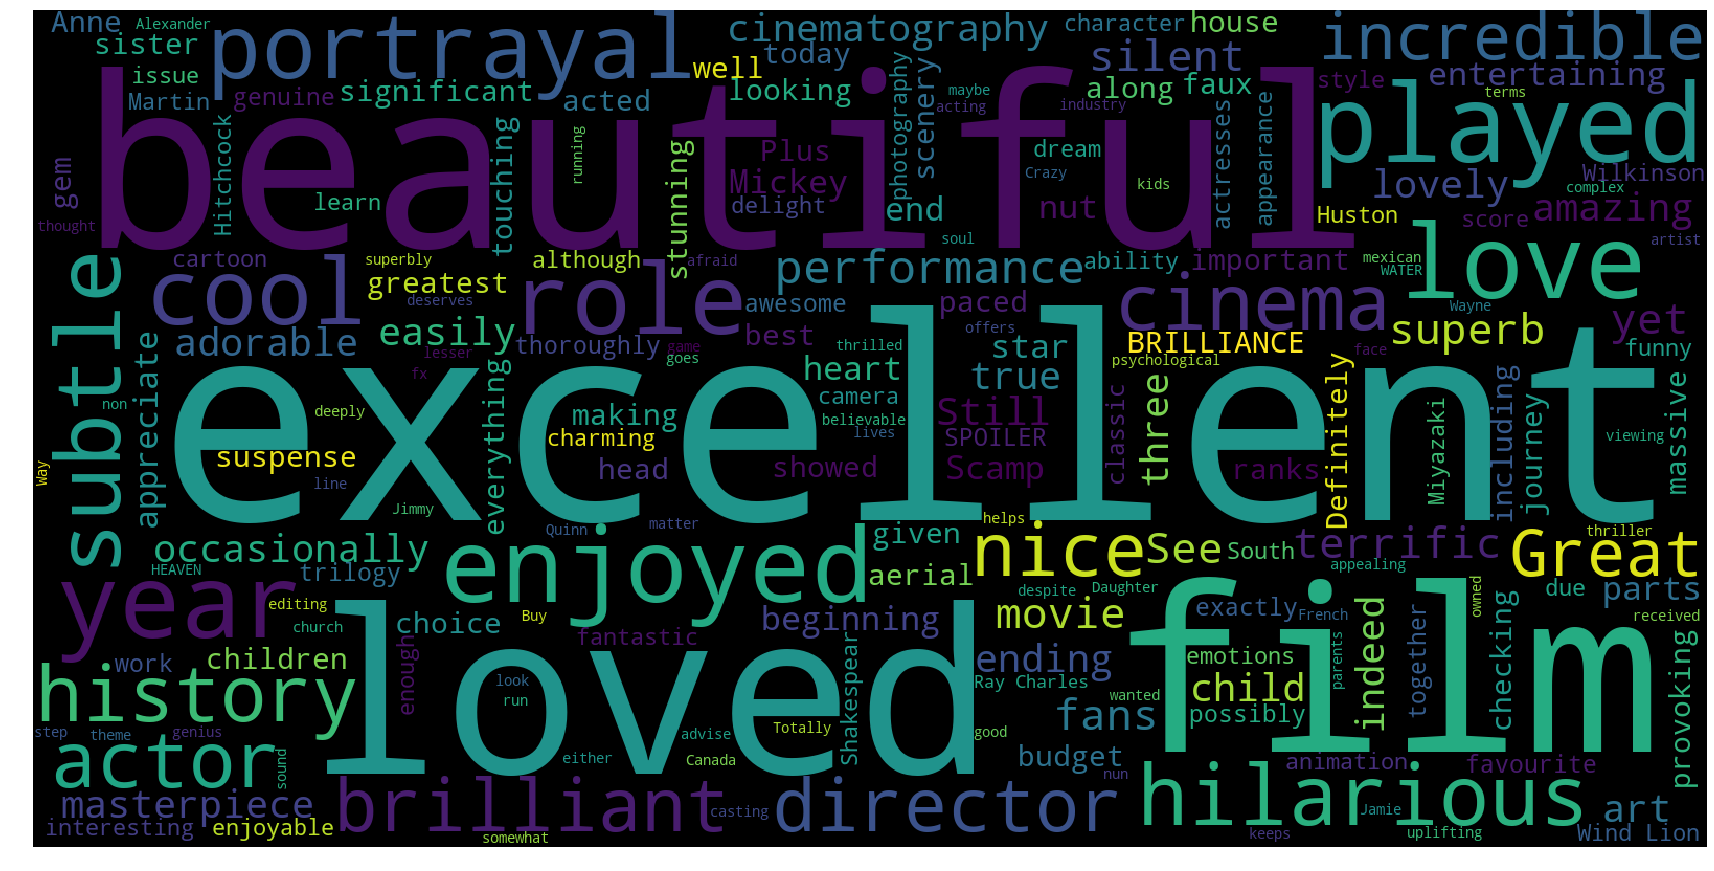

In [578]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud22)
plt.axis("off")
plt.show()

# 2. Data Preprocessing
Next step will be preprocess the data in order to make the learning process more smooth.

Preprocessing steps:

- Convert sentence into lower case
- Remove Stop Words
- Stemming

In [579]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [580]:
def processed(feed):
    # change sentence to lower case
    feed=feed.lower().split()
    # remove stop words                
    feed=[fd for fd in feed if not fd in stopwords.words("english")]
    # stemming the words
    snow=SnowballStemmer("english")
    feed=[snow.stem(fd) for fd in feed]
    return(" ".join(feed))

In [581]:
data['feedback_processed']=data['feedback'].apply(lambda x: processed(x))

data.head()

,feedback,label,feedback_length,feedback_processed
0,"A very, very, very slow-moving, aimless movie ...",0,87,"very, very, slow-moving, aimless movi distress..."
1,Not sure who was more lost - the flat characte...,0,99,"sure lost - flat charact audience, near half w..."
2,Attempting artiness with black & white and cle...,0,188,attempt arti black & white clever camera angle...
3,Very little music or anything to speak of.,0,44,littl music anyth speak of.
4,The best scene in the movie was when Gerardo i...,1,108,best scene movi gerardo tri find song keep run...


# 3. Data Preparation
In this project I am using a variation of word2vec i.e. GloVe(Global Vectors for Word Representation by Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014).This introduces a concept of negative sampling into the word2vec algorithm. I have used pre-trained word vectors in the project that is open sourced in the Stanford website. Read more about GloVe here: https://nlp.stanford.edu/projects/glove/

Download the word embedding with GloVe here: http://nlp.stanford.edu/data/glove.6B.zip This has many text files with different dimensions of the word vectors. I have used the glove.6B.50d.txt. Each line has space separated word and embeddings of 50 dimension .

In [582]:
import gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [583]:
glove2word2vec(glove_input_file='glove.6B.50d.txt',word2vec_output_file="Vectors.txt")
Key_vector=KeyedVectors.load_word2vec_format("Vectors.txt")


### Using word embeddings for sentiment classification

I have used two methods for the classification:

##### Unweighted sentence vectors:

 Sentence vector non-normalized(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))

##### Normalized sentence vectors:

 Sentence vector normalized(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))/ (number of words)



### Unweighted Sentence Vector

In [584]:
List=[0]*50
def  Sum(s,List,fd):
    vt=List
    for i in s:
        try:
            vt=np.add(vt,Key_vector[i])
        except:
            vt=np.add(vt,List)
            continue
    return vt[fd]

Making a new dataset by copying "data"

In [585]:
unweighted=data.copy()

for i in range(50):
    unweighted['vector'+str(i)]=unweighted['feedback_processed'].apply(Sum,args=[List,i])

unweighted.head(10)

,feedback,label,feedback_length,feedback_processed,vector0,vector1,vector2,vector3,vector4,vector5,...,vector40,vector41,vector42,vector43,vector44,vector45,vector46,vector47,vector48,vector49
0,"A very, very, very slow-moving, aimless movie ...",0,87,"very, very, slow-moving, aimless movi distress...",-3.378200,51.851210,32.548182,41.170720,13.790286,-0.116288,...,42.458390,9.350141,-1.809916,-12.413523,-6.641224,21.953084,7.614435,-29.516036,15.811471,52.539110
1,Not sure who was more lost - the flat characte...,0,99,"sure lost - flat charact audience, near half w...",-5.210791,34.037420,27.762027,30.291000,17.565326,2.555078,...,32.618143,7.114785,-12.224537,-1.557147,-2.288562,12.823339,8.242551,-13.784878,13.784870,39.812561
2,Attempting artiness with black & white and cle...,0,188,attempt arti black & white clever camera angle...,-8.065146,88.104631,67.552371,69.671191,38.836405,1.534273,...,83.721405,12.047975,-21.013243,2.597455,-2.700610,32.265835,20.355458,-44.759538,38.534133,84.581211
3,Very little music or anything to speak of.,0,44,littl music anyth speak of.,-3.135861,18.520470,15.454389,15.119240,11.668690,-1.583044,...,15.155298,-1.704918,-3.910360,-0.509463,-2.864295,2.964202,4.907224,-8.453298,8.184060,17.193210
4,The best scene in the movie was when Gerardo i...,1,108,best scene movi gerardo tri find song keep run...,-1.285973,35.258330,30.117404,30.019420,11.822940,0.169241,...,35.921073,7.741354,-9.113611,-2.550403,-4.987643,17.162882,8.545186,-18.412375,12.014847,47.746061
5,"The rest of the movie lacks art, charm, meanin...",0,114,"rest movi lack art, charm, meaning... emptines...",-4.759139,47.888780,38.107069,40.152940,23.127076,2.346595,...,38.836416,4.409639,-6.664608,-0.562969,-7.637919,14.242521,10.645351,-24.490743,15.163885,43.926311
6,Wasted two hours.,0,19,wast two hours.,-3.584952,12.202100,8.628270,10.917240,4.434522,-0.877836,...,9.588246,0.066971,-2.505791,-1.372655,0.442455,3.361693,1.098152,-5.949586,5.642247,10.473570
7,Saw the movie today and thought it was a good ...,1,79,"saw movi today thought good effort, good messa...",-5.454417,42.113990,24.231132,34.555810,14.117386,-0.677695,...,32.938495,2.975335,-4.035849,-8.707557,-1.664865,12.764142,6.096355,-22.793214,15.994534,44.681480
8,A bit predictable.,0,20,bit predictable.,-0.692560,8.456380,8.106114,8.757740,5.655800,2.299944,...,10.509388,2.909401,-3.316553,1.802952,0.047805,6.202280,2.383027,-5.545642,4.474929,14.401720
9,Loved the casting of Jimmy Buffet as the scien...,1,59,love cast jimmi buffet scienc teacher.,-3.143261,24.585420,21.392354,21.663010,12.977300,-3.939917,...,28.479513,3.008421,-2.427573,0.524817,-3.092137,12.213353,6.411636,-14.094428,9.499580,26.101870


In [586]:
data.head(4)

,feedback,label,feedback_length,feedback_processed
0,"A very, very, very slow-moving, aimless movie ...",0,87,"very, very, slow-moving, aimless movi distress..."
1,Not sure who was more lost - the flat characte...,0,99,"sure lost - flat charact audience, near half w..."
2,Attempting artiness with black & white and cle...,0,188,attempt arti black & white clever camera angle...
3,Very little music or anything to speak of.,0,44,littl music anyth speak of.


### Normalised Sentence Vector

In [587]:
List=[0]*50
def  Sum(s,List,fd):
    vt=List
    for i in s:
        try:
            vt=np.add(vt,Key_vector[i])
        except:
            vt=np.add(vt,List)
            continue
    vt=np.divide(vt,len(vt))
    return vt[fd]

Making a new dataset by copying "data"

In [588]:
normalised=data.copy()

for i in range(50):
    normalised['vector'+str(i)]=normalised['feedback_processed'].apply(Sum,args=[List,i])

normalised.head(10)

,feedback,label,feedback_length,feedback_processed,vector0,vector1,vector2,vector3,vector4,vector5,...,vector40,vector41,vector42,vector43,vector44,vector45,vector46,vector47,vector48,vector49
0,"A very, very, very slow-moving, aimless movie ...",0,87,"very, very, slow-moving, aimless movi distress...",-0.067564,1.037024,0.650964,0.823414,0.275806,-0.002326,...,0.849168,0.187003,-0.036198,-0.248270,-0.132824,0.439062,0.152289,-0.590321,0.316229,1.050782
1,Not sure who was more lost - the flat characte...,0,99,"sure lost - flat charact audience, near half w...",-0.104216,0.680748,0.555241,0.605820,0.351307,0.051102,...,0.652363,0.142296,-0.244491,-0.031143,-0.045771,0.256467,0.164851,-0.275698,0.275697,0.796251
2,Attempting artiness with black & white and cle...,0,188,attempt arti black & white clever camera angle...,-0.161303,1.762093,1.351047,1.393424,0.776728,0.030685,...,1.674428,0.240960,-0.420265,0.051949,-0.054012,0.645317,0.407109,-0.895191,0.770683,1.691624
3,Very little music or anything to speak of.,0,44,littl music anyth speak of.,-0.062717,0.370409,0.309088,0.302385,0.233374,-0.031661,...,0.303106,-0.034098,-0.078207,-0.010189,-0.057286,0.059284,0.098144,-0.169066,0.163681,0.343864
4,The best scene in the movie was when Gerardo i...,1,108,best scene movi gerardo tri find song keep run...,-0.025719,0.705167,0.602348,0.600388,0.236459,0.003385,...,0.718421,0.154827,-0.182272,-0.051008,-0.099753,0.343258,0.170904,-0.368247,0.240297,0.954921
5,"The rest of the movie lacks art, charm, meanin...",0,114,"rest movi lack art, charm, meaning... emptines...",-0.095183,0.957776,0.762141,0.803059,0.462542,0.046932,...,0.776728,0.088193,-0.133292,-0.011259,-0.152758,0.284850,0.212907,-0.489815,0.303278,0.878526
6,Wasted two hours.,0,19,wast two hours.,-0.071699,0.244042,0.172565,0.218345,0.088690,-0.017557,...,0.191765,0.001339,-0.050116,-0.027453,0.008849,0.067234,0.021963,-0.118992,0.112845,0.209471
7,Saw the movie today and thought it was a good ...,1,79,"saw movi today thought good effort, good messa...",-0.109088,0.842280,0.484623,0.691116,0.282348,-0.013554,...,0.658770,0.059507,-0.080717,-0.174151,-0.033297,0.255283,0.121927,-0.455864,0.319891,0.893630
8,A bit predictable.,0,20,bit predictable.,-0.013851,0.169128,0.162122,0.175155,0.113116,0.045999,...,0.210188,0.058188,-0.066331,0.036059,0.000956,0.124046,0.047661,-0.110913,0.089499,0.288034
9,Loved the casting of Jimmy Buffet as the scien...,1,59,love cast jimmi buffet scienc teacher.,-0.062865,0.491708,0.427847,0.433260,0.259546,-0.078798,...,0.569590,0.060168,-0.048551,0.010496,-0.061843,0.244267,0.128233,-0.281889,0.189992,0.522037


In [589]:
data.head(4)

,feedback,label,feedback_length,feedback_processed
0,"A very, very, very slow-moving, aimless movie ...",0,87,"very, very, slow-moving, aimless movi distress..."
1,Not sure who was more lost - the flat characte...,0,99,"sure lost - flat charact audience, near half w..."
2,Attempting artiness with black & white and cle...,0,188,attempt arti black & white clever camera angle...
3,Very little music or anything to speak of.,0,44,littl music anyth speak of.


# 3. Data Preparation
Preparing the data by deleting unwanted columns from the dataset .

In [590]:
unweighted=unweighted.drop(["feedback","feedback_processed","feedback_length"],axis=1)
normalised=normalised.drop(["feedback","feedback_processed","feedback_length"],axis=1)

In [591]:
unweighted.head(4)

,label,vector0,vector1,vector2,vector3,vector4,vector5,vector6,vector7,vector8,...,vector40,vector41,vector42,vector43,vector44,vector45,vector46,vector47,vector48,vector49
0,0,-3.378200,51.851210,32.548182,41.170720,13.790286,-0.116288,21.80371,-38.06118,-19.363190,...,42.458390,9.350141,-1.809916,-12.413523,-6.641224,21.953084,7.614435,-29.516036,15.811471,52.539110
1,0,-5.210791,34.037420,27.762027,30.291000,17.565326,2.555078,14.52960,-36.72028,-9.436702,...,32.618143,7.114785,-12.224537,-1.557147,-2.288562,12.823339,8.242551,-13.784878,13.784870,39.812561
2,0,-8.065146,88.104631,67.552371,69.671191,38.836405,1.534273,30.22021,-88.58007,-26.418941,...,83.721405,12.047975,-21.013243,2.597455,-2.700610,32.265835,20.355458,-44.759538,38.534133,84.581211
3,0,-3.135861,18.520470,15.454389,15.119240,11.668690,-1.583044,8.60940,-17.88946,-8.219731,...,15.155298,-1.704918,-3.910360,-0.509463,-2.864295,2.964202,4.907224,-8.453298,8.184060,17.193210


In [592]:
normalised.head(4)

,label,vector0,vector1,vector2,vector3,vector4,vector5,vector6,vector7,vector8,...,vector40,vector41,vector42,vector43,vector44,vector45,vector46,vector47,vector48,vector49
0,0,-0.067564,1.037024,0.650964,0.823414,0.275806,-0.002326,0.436074,-0.761224,-0.387264,...,0.849168,0.187003,-0.036198,-0.248270,-0.132824,0.439062,0.152289,-0.590321,0.316229,1.050782
1,0,-0.104216,0.680748,0.555241,0.605820,0.351307,0.051102,0.290592,-0.734406,-0.188734,...,0.652363,0.142296,-0.244491,-0.031143,-0.045771,0.256467,0.164851,-0.275698,0.275697,0.796251
2,0,-0.161303,1.762093,1.351047,1.393424,0.776728,0.030685,0.604404,-1.771601,-0.528379,...,1.674428,0.240960,-0.420265,0.051949,-0.054012,0.645317,0.407109,-0.895191,0.770683,1.691624
3,0,-0.062717,0.370409,0.309088,0.302385,0.233374,-0.031661,0.172188,-0.357789,-0.164395,...,0.303106,-0.034098,-0.078207,-0.010189,-0.057286,0.059284,0.098144,-0.169066,0.163681,0.343864


In [593]:
x_unweighted=unweighted.iloc[:,1:]
y_unweighted=unweighted.iloc[:,:1]

In [594]:
x_normalised=normalised.iloc[:,1:]
y_normalised=normalised.iloc[:,:1]

# 4. Model Building and Evaluation

Spliting the dataset into train and test .

In [595]:
from sklearn.model_selection import train_test_split
x_train_un,x_test_un,y_train_un,y_test_un=train_test_split(x_unweighted,y_unweighted,test_size=0.2,random_state=42)

In [596]:
x_train_nor,x_test_nor,y_train_nor,y_test_nor=train_test_split(x_normalised,y_normalised,test_size=0.2,random_state=42)

Importing metrics to calculate accuracy and performance of model

In [597]:
from sklearn.metrics import accuracy_score,f1_score

### Logistic Regression
On Unweighted dataset

In [621]:
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression()
LR1.fit(x_train_un,y_train_un)
y_un=LR1.predict(x_test_un)
accuracy_LR_un=accuracy_score(y_test_un,y_un)*100
f1_LR_un=f1_score(y_test_un,y_un)
print("Accuracy :",accuracy_LR_un,"%")
print("F1 score :",f1_LR_un)

Accuracy : 54.50000000000001 %
F1 score : 0.5645933014354066


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Logistic Regression
On Normalised dataset

In [624]:
LR2=LogisticRegression()
LR2.fit(x_train_nor,y_train_nor)
y_nor=LR2.predict(x_test_nor)
accuracy_LR_nor=accuracy_score(y_test_nor,y_nor)*100
f1_LR_nor=f1_score(y_test_nor,y_nor)
print("Accuracy :",accuracy_LR_nor,"%")
print("F1 score :",f1_LR_nor)

Accuracy : 51.0 %
F1 score : 0.45555555555555555


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Comparing the Two datasets 

(10, 60)

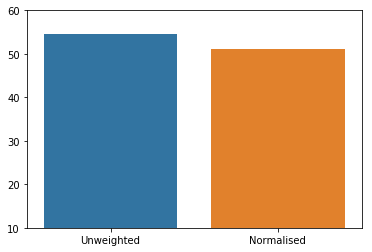

In [625]:
accuracy_LR=[accuracy_LR_un,accuracy_LR_nor]
Sentence_vector=["Unweighted","Normalised"]
g=sns.barplot(x=Sentence_vector,y=accuracy_LR)
g.set_ylim(10,60)

### Naive Bayes
On Unweighted dataset

In [627]:
from sklearn.naive_bayes import GaussianNB
NB1 = GaussianNB()
NB1.fit(x_train_un,y_train_un)
y_un= NB1.predict(x_test_un)
accuracy_NB_un=accuracy_score(y_test_un,y_un)*100
f1_NB_un=f1_score(y_test_un,y_un)
print("Accuracy :",accuracy_NB_un,"%")
print("F1 score :",f1_NB_un)

Accuracy : 49.0 %
F1 score : 0.32


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Naive Bayes
On Normalised dataset

In [629]:
NB2 = GaussianNB()
NB2.fit(x_train_nor,y_train_nor)
y_nor=NB2.predict(x_test_nor)
accuracy_NB_nor=accuracy_score(y_test_nor,y_nor)*100
f1_NB_nor=f1_score(y_test_nor,y_nor)
print("Accuracy :",accuracy_NB_nor,"%")
print("F1 score :",f1_NB_nor)

Accuracy : 49.0 %
F1 score : 0.32


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Comparing the two datasets

(10, 60)

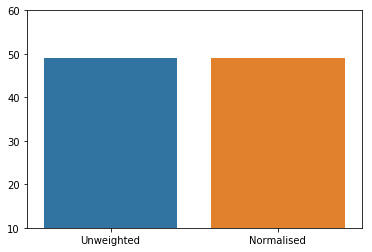

In [630]:
accuracy_NB=[accuracy_NB_un,accuracy_NB_nor]
Sentence_vector=["Unweighted","Normalised"]
g=sns.barplot(x=Sentence_vector,y=accuracy_NB)
g.set_ylim(10,60)

### SVM
On Unweighted dataset

In [633]:
from sklearn.svm import SVC
SVC1 = SVC()
SVC1.fit(x_train_un,y_train_un)
y_un= SVC1.predict(x_test_un)
accuracy_SVC_un=accuracy_score(y_test_un,y_un)*100
f1_SVC_un=f1_score(y_test_un,y_un)
print("Accuracy :",accuracy_SVC_un,"%")
print("F1 score :",f1_SVC_un)

Accuracy : 48.0 %
F1 score : 0.30666666666666664


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### SVM
On Normalised dataset

In [635]:
SVC2 = SVC()
SVC2.fit(x_train_nor,y_train_nor)
y_nor=SVC2.predict(x_test_nor)
accuracy_SVC_nor=accuracy_score(y_test_nor,y_nor)*100
f1_SVC_nor=f1_score(y_test_nor,y_nor)
print("Accuracy :",accuracy_SVC_nor,"%")
print("F1 score :",f1_SVC_nor)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 48.5 %
F1 score : 0.326797385620915


Comparing the two datasets

(5, 55)

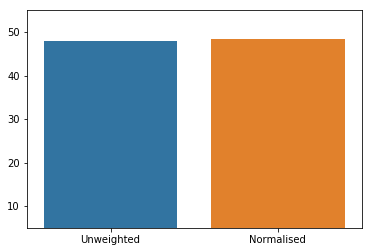

In [636]:
accuracy_SVC=[accuracy_SVC_un,accuracy_SVC_nor]
Sentence_vector=["Unweighted","Normalised"]
g=sns.barplot(x=Sentence_vector,y=accuracy_SVC)
g.set_ylim(5,55)

### Random Forest
On Unweighted dataset

In [659]:
from sklearn.ensemble import RandomForestClassifier
RFC1 = RandomForestClassifier()
RFC1.fit(x_train_un,y_train_un)
y_un= RFC1.predict(x_test_un)
accuracy_RFC_un=accuracy_score(y_test_un,y_un)*100
f1_RFC_un=f1_score(y_test_un,y_un)
print("Accuracy :",accuracy_RFC_un,"%")
print("F1 score :",f1_RFC_un)

Accuracy : 57.49999999999999 %
F1 score : 0.5502645502645502


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Random Forest
On Normalised dataset

In [700]:
RFC2 = RandomForestClassifier()
RFC2.fit(x_train_nor,y_train_nor)
y_nor=RFC2.predict(x_test_nor)
accuracy_RFC_nor=accuracy_score(y_test_nor,y_nor)*100
f1_RFC_nor=f1_score(y_test_nor,y_nor)
print("Accuracy :",accuracy_RFC_nor,"%")
print("F1 score :",f1_RFC_nor)

Accuracy : 58.5 %
F1 score : 0.5561497326203209


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Comparing the two datasets

(10, 60)

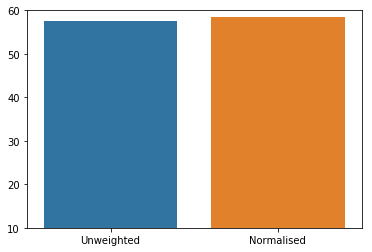

In [701]:
accuracy_RFC=[accuracy_RFC_un,accuracy_RFC_nor]
Sentence_vector=["Unweighted","Normalised"]
g=sns.barplot(x=Sentence_vector,y=accuracy_RFC)
g.set_ylim(10,60)

### Decision Tree
On Unweighted dataset

In [705]:
from sklearn.tree import DecisionTreeClassifier
DT1 = DecisionTreeClassifier()
DT1.fit(x_train_un,y_train_un)
y_un= DT1.predict(x_test_un)
accuracy_DT_un=accuracy_score(y_test_un,y_un)*100
f1_DT_un=f1_score(y_test_un,y_un)
print("Accuracy :",accuracy_DT_un,"%")
print("F1 score :",f1_DT_un)

Accuracy : 57.99999999999999 %
F1 score : 0.6146788990825688


### Decision Tree
On Normalised dataset

In [736]:
DT2 = DecisionTreeClassifier()
DT2.fit(x_train_nor,y_train_nor)
y_nor=DT2.predict(x_test_nor)
accuracy_DT_nor=accuracy_score(y_test_nor,y_nor)*100
f1_DT_nor=f1_score(y_test_nor,y_nor)
print("Accuracy :",accuracy_DT_nor,"%")
print("F1 score :",f1_DT_nor)

Accuracy : 59.0 %
F1 score : 0.6203703703703702


Comparin the two datasets

(10, 65)

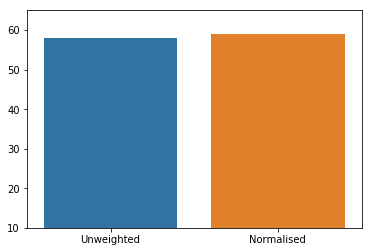

In [737]:
accuracy_DT=[accuracy_DT_un,accuracy_DT_nor]
Sentence_vector=["Unweighted","Normalised"]
g=sns.barplot(x=Sentence_vector,y=accuracy_DT)
g.set_ylim(10,65)

## Comparison Chart



#### For Unweighted Dataset

In [738]:
accuracy_un=[accuracy_LR_un,accuracy_NB_un,accuracy_SVC_un,accuracy_RFC_un,accuracy_DT_un]

f1_score_un = [f1_LR_un,f1_NB_un,f1_SVC_un,f1_RFC_un,f1_DT_un]
d = {
    'Algorithms' : ['Logistic Regression','Naive Bayes','SVM','Random Forest','Decision Tree'],
    'F1_Score' : f1_score_un,
    'Accuracy' : accuracy_un
}
unweighted_df = pd.DataFrame(d)
unweighted_df

,Algorithms,F1_Score,Accuracy
0,Logistic Regression,0.564593,54.5
1,Naive Bayes,0.320000,49.0
2,SVM,0.306667,48.0
3,Random Forest,0.550265,57.5
4,Decision Tree,0.614679,58.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

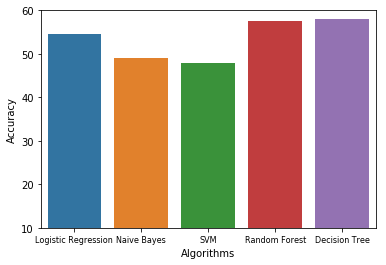

In [739]:
g=sns.barplot(x=unweighted_df.Algorithms,y=unweighted_df.Accuracy)
g.set_ylim(10,60)
plt.xticks(fontsize=8)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

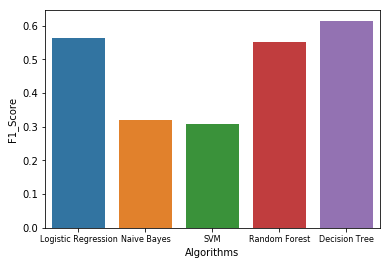

In [740]:
sns.barplot(x=unweighted_df.Algorithms,y=unweighted_df.F1_Score)
plt.xticks(fontsize=8)


#### For Normalised Dataset

In [741]:
accuracy_nor=[accuracy_LR_nor,accuracy_NB_nor,accuracy_SVC_nor,accuracy_RFC_nor,accuracy_DT_nor]

f1_score_nor = [f1_LR_nor,f1_NB_nor,f1_SVC_nor,f1_RFC_nor,f1_DT_nor]
print("Unweighted dataset")
d = {
    'Algorithms' : ['Logistic Regression','Naive Bayes','SVM','Random Forest','Decision Tree'],
    'F1_Score' : f1_score_nor,
    'Accuracy' : accuracy_nor
}
normalised_df = pd.DataFrame(d)
normalised_df

Unweighted dataset


,Algorithms,F1_Score,Accuracy
0,Logistic Regression,0.455556,51.0
1,Naive Bayes,0.320000,49.0
2,SVM,0.326797,48.5
3,Random Forest,0.556150,58.5
4,Decision Tree,0.620370,59.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

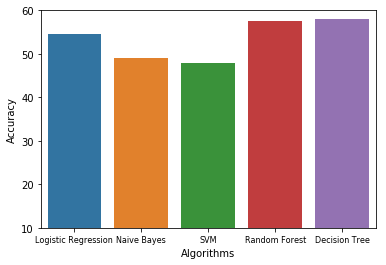

In [742]:
g=sns.barplot(x=unweighted_df.Algorithms,y=unweighted_df.Accuracy)
g.set_ylim(10,60)
plt.xticks(fontsize=8)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

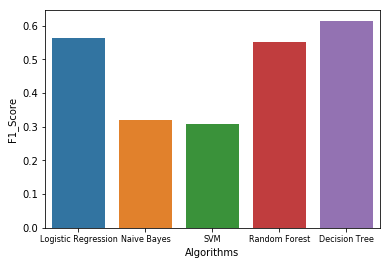

In [743]:
sns.barplot(x=unweighted_df.Algorithms,y=unweighted_df.F1_Score)
plt.xticks(fontsize=8)

Conclusion : Compared different classifier models on both the datasets ( Unweighted dataset and Normalised dataset ) .